# Chart Remake - Google Trends: Hangover Cure

This is a remake of chartr.co plot using matplotlib. Note that the dataset date range is different.

--- 

@date: 03-Oct-2020 | @author: katnoria

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

sns.set_theme(style="white")

%matplotlib inline

In [4]:
def version_info(cls):
    print(f"{cls.__name__}: {cls.__version__}")

In [5]:
print("Library VersionInfo:")
print("-"*20)
version_info(pd)
version_info(sns)

Library VersionInfo:
--------------------
pandas: 0.24.2
seaborn: 0.11.0


# Data 💰

We have downloaded the data and made available on the github, so we will just use that.

In [50]:
df = pd.read_csv("../data/us-90days.csv", parse_dates=["Day"])

In [51]:
# Basic info and stats
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
Day                               90 non-null datetime64[ns]
hangover cure: (United States)    90 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.5 KB


In [52]:
df.describe()

,hangover cure: (United States)
count,90.000000
mean,29.633333
std,18.847973
min,6.000000
25%,16.000000
50%,22.000000
75%,42.750000
max,100.000000


In [53]:
# see first few rows
df.head()

,Day,hangover cure: (United States)
0,2020-05-30,55
1,2020-05-31,57
2,2020-06-01,20
3,2020-06-02,12
4,2020-06-03,16


In [70]:
df.columns = ['Day', 'Count']
df.head()

,Count,day_of_week,month
Day,,,
2020-05-30,55,Saturday,May
2020-05-31,57,Sunday,May
2020-06-01,20,Monday,June
2020-06-02,12,Tuesday,June
2020-06-03,16,Wednesday,June


In [71]:
# Add a weekend mask for filtering data
df = df.reset_index()
df["weekday"] = df.Day.dt.weekday
df['day_of_week'] = df.Day.dt.day_name()
df['month'] = df.Day.dt.month_name()
df.head()

,Day,Count,day_of_week,month,weekday
0,2020-05-30,55,Saturday,May,5
1,2020-05-31,57,Sunday,May,6
2,2020-06-01,20,Monday,June,0
3,2020-06-02,12,Tuesday,June,1
4,2020-06-03,16,Wednesday,June,2


In [72]:
df = df.set_index("Day")

In [110]:
grouped_df = df.groupby(["month", "weekday"], sort=False).agg(sum).reset_index()
grouped_df.head(3)

,month,weekday,Count
0,May,5,55
1,May,6,57
2,June,0,120


In [111]:
grouped_df_pivot = grouped_df.pivot("month", "weekday", "Count")
grouped_df_pivot

weekday,0,1,2,3,4,5,6
month,,,,,,,
August,104.0,52.0,57.0,77.0,80.0,203.0,225.0
July,89.0,63.0,83.0,83.0,113.0,201.0,260.0
June,120.0,80.0,71.0,64.0,80.0,187.0,263.0
May,NaN,NaN,NaN,NaN,NaN,55.0,57.0


In [113]:
grouped_df_pivot.dropna(axis='rows', inplace=True)

In [114]:
cmap = sns.diverging_palette(130, 15, as_cmap=True)
xticklabels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

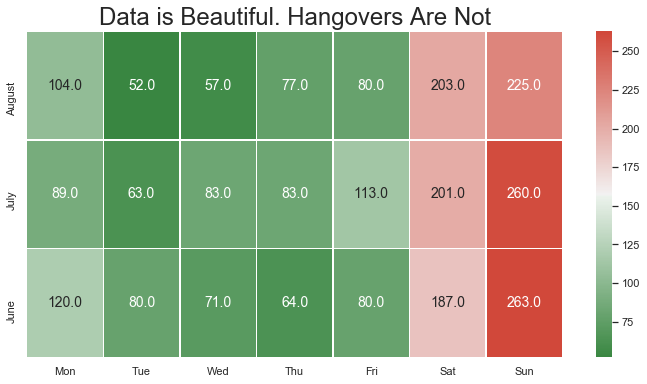

In [119]:
f, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(grouped_df_pivot, xticklabels=xticklabels, annot=True, fmt=".1f", linewidths=.5, ax=ax, cmap=cmap, annot_kws={'size': 14})
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("Data is Beautiful. Hangovers Are Not", fontsize=24)
plt.show()